# Convolution Neural Networks (CNN) - VGG16 (Fine tuned)

###  Deep learning on images

Classify images into two categories(Cat vs Dog) using fine tuned VGG16 CNN model and Keras library.

#### VGG16

VGG16 is a convolutional neural network model proposed by K. Simonyan and A. Zisserman from the University of Oxford in the paper “Very Deep Convolutional Networks for Large-Scale Image Recognition”. It was submitted to Large Scale Visual Recognition Challenge 2014 (ILSVRC2014) and The model achieves 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to 1000 classes. It makes the improvement over AlexNet by replacing large kernel-sized filters (11 and 5 in the first and second convolutional layer, respectively) with multiple 3×3 kernel-sized filters one after another.

The VGG() class takes a few arguments that may only interest you if you are looking to use the model in your own project, e.g. for transfer learning.

For example:
 - **include_top** (True): Whether or not to include the output layers for the model. You don’t need these if you are fitting the model on your own problem.
 - **weights** (‘imagenet‘): What weights to load. You can specify None to not load pre-trained weights if you are interested in training the model yourself from scratch.
 - **input_tensor** (None): A new input layer if you intend to fit the model on new data of a different size.
 - **input_shape** (None): The size of images that the model is expected to take if you change the input layer.
 - **pooling** (None): The type of pooling to use when you are training a new set of output layers.
 - **classes** (1000): The number of classes (e.g. size of output vector) for the model.
 
Next, let’s look at using the loaded VGG model to classify ad hoc photographs.

https://arxiv.org/abs/1409.1556v6

#### Data
You can prepare your own data of images or you can download the cat vs dog images from the kaggle website - 
https://www.kaggle.com/c/dogs-vs-cats/data

#### Reference:
https://www.learnopencv.com/keras-tutorial-fine-tuning-using-pre-trained-models/
https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

### Importing libraries and splitting the dataset

In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Activation, Flatten, Dense
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras import optimizers, regularizers
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import os.path
from os import path
import shutil
import gc

Using TensorFlow backend.


In [31]:
%config IPCompleter.greedy=True

In [3]:
np.random.seed(4)

In [4]:
def createDataDirctory():
    
    # path to the directory where orininal dataset was uncompressed
    global original_dataset_dir 
    original_dataset_dir = '/home/agoel/Technical/DL/keras-DL-NN/data/cat_dog_original/train'
    
    # base directory location
    global base_dir 
    base_dir = '/home/agoel/Technical/DL/keras-DL-NN/data'

    train_dir = os.path.join(base_dir, 'train')
    valid_dir = os.path.join(base_dir, 'valid')
    test_dir = os.path.join(base_dir, 'test')

    if (not os.path.isdir(test_dir)):
        os.mkdir(test_dir)

    global train_cats_dir
    train_cats_dir = os.path.join(train_dir, 'cats')
    if (not os.path.isdir(train_cats_dir)):
        os.mkdir(train_cats_dir)

    global train_dogs_dir 
    train_dogs_dir = os.path.join(train_dir, 'dogs')
    if (not os.path.isdir(train_dogs_dir)):
        os.mkdir(train_dogs_dir)

    # directory with validation cat pictures
    global valid_cats_dir 
    valid_cats_dir = os.path.join(valid_dir, 'cats')
    if (not os.path.isdir(valid_cats_dir)):
        os.mkdir(valid_cats_dir)

    # Directory with validation dog pictures
    global valid_dogs_dir 
    valid_dogs_dir = os.path.join(valid_dir, 'dogs')
    if (not os.path.isdir(valid_dogs_dir)):
        os.mkdir(valid_dogs_dir)

    global test_cats_dir 
    test_cats_dir = os.path.join(test_dir, 'cats')
    if (not os.path.isdir(test_cats_dir)):
        os.mkdir(test_cats_dir)

    global test_dogs_dir 
    test_dogs_dir = os.path.join(test_dir, 'dogs')
    if (not os.path.isdir(test_dogs_dir)):
        os.mkdir(test_dogs_dir)

In [5]:
def prepareData():
    
    # Create directories for data
    createDataDirctory()
    
    # copies the first 1000 cat images to train_cats_dir
    fnames = ['cat.{}.jpg'.format(i) for i in range(0, 1000)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(train_cats_dir, fname)
        shutil.copyfile(src, dst)

    # Copies the next 500 cat images to valid_cats_dir
    fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(valid_cats_dir, fname)
        shutil.copyfile(src, dst)

    # copies the next 500 images to test_cats_dir
    fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(test_cats_dir, fname)
        shutil.copyfile(src, dst)

    # Copies the first 1,000 dog images to train_dogs_dir
    fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(train_dogs_dir, fname)
        shutil.copyfile(src, dst)

    # Copies the next 500 dog images to valid_dogs_dir
    fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(valid_dogs_dir, fname)
        shutil.copyfile(src, dst)

        # Copies the next 500 dog images to test_dogs_dir
    fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(test_dogs_dir, fname)
        shutil.copyfile(src, dst)

In [6]:
def getImageCount():
    # As a sanity check, count the number of images in each set
    print('total training cat images:', len(os.listdir(train_cats_dir)))
    print('total training dog images:', len(os.listdir(train_dogs_dir)))
    print('total validation cat images:', len(os.listdir(valid_cats_dir)))
    print('total validation dog images:', len(os.listdir(valid_dogs_dir)))
    print('total test cat images:', len(os.listdir(test_cats_dir)))
    print('total test dog images:', len(os.listdir(test_dogs_dir)))

In [7]:
def getRelativeDataPath():
    
    relativePaths = {}
    
    # relative path to the train, test and validation data
    relativePaths['trainPath'] = 'data/train'
    relativePaths['validPath'] = 'data/valid'
    relativePaths['testPath']  = 'data/test'
    
    return relativePaths

In [8]:
def getDataGen():
    
    global train_datagen
    global valid_datagen
    global test_datagen
    
    # Data augmentation on training set
    # rescale: rescaling factor. Defaults to None. If None or 0, no rescaling is applied, otherwise we multiply the data by the value provided (after applying all other transformations).
    # rotation_range is a value in degrees (0–180), a range within which to ran- domly rotate pictures.
    # zoom_range is for randomly zooming inside pictures.
    # shear_range is for randomly applying shearing transformations.
    # horizontal_flip is for randomly flipping half the images horizontally—rele-vant when there are no 
    # assumptions of horizontal asymmetry (for example, real-world pictures).
    train_datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=20,
            width_shift_range=0.2,
            height_shift_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest')

    # validation data should not be augmented
    valid_datagen = ImageDataGenerator(rescale=1./255)

    # validation and test datagen should be same
    test_datagen = ImageDataGenerator(rescale=1/.255)

In [9]:
def getDataBatches(train_batch_size, valid_batch_size, test_batch_size, imageSize):
    
    global train_batches
    global valid_batches
    global test_batches
    
    prepareData()
    
    getImageCount()
    
    relativePaths =  getRelativeDataPath()
    train_path = relativePaths['trainPath']  
    valid_path = relativePaths['validPath']
    test_path = relativePaths['testPath']
    
    # The input training images can be of any size and target_size parameter will resize the input images to 224x224
    train_batches = train_datagen.flow_from_directory(train_path, target_size=(imageSize,imageSize), classes=['cats', 'dogs'], batch_size=train_batch_size)
    valid_batches = valid_datagen.flow_from_directory(valid_path, target_size=(imageSize,imageSize), classes=['cats', 'dogs'], batch_size=valid_batch_size)
    test_batches  = test_datagen.flow_from_directory(test_path, target_size=(imageSize,imageSize), classes=['cats', 'dogs'], batch_size=test_batch_size)
    
    return train_batches, valid_batches, test_batches

## Displaying some randomly augmented training images

In [10]:
def displayAugmentedImage(train_path, imagePath, imageName, imageSize):
    
    getDataGen()
    
    # Module with image-preporcessing utilities
    train_dir_a = os.path.join(train_path, imagePath)
    img_path = os.path.join(train_dir_a, imageName)

    # reads the image and resizes it
    img = image.load_img(img_path, target_size=(imageSize,imageSize))

    # converts it into numpy array with shape (imageSize, imageSize, 3)
    x = image.img_to_array(img)

    # reshape image to (1, imageSize, imageSize, 3)
    x = x.reshape((1,) + x.shape)

    i=0

    # Generates batches of randomly transformed images. Loops indefinitely, so we need to break the loop at some point!
    f = plt.figure(figsize=(24,12))
    for batch in train_datagen.flow(x, batch_size=1):
        sp = f.add_subplot(2, 4, i+1)
        # plt.figure(i, figsize=(24,12))
        imgplot = plt.imshow(image.array_to_img(batch[0]))
        i +=1 
        if i % 8 == 0:
            break
    plt.show()

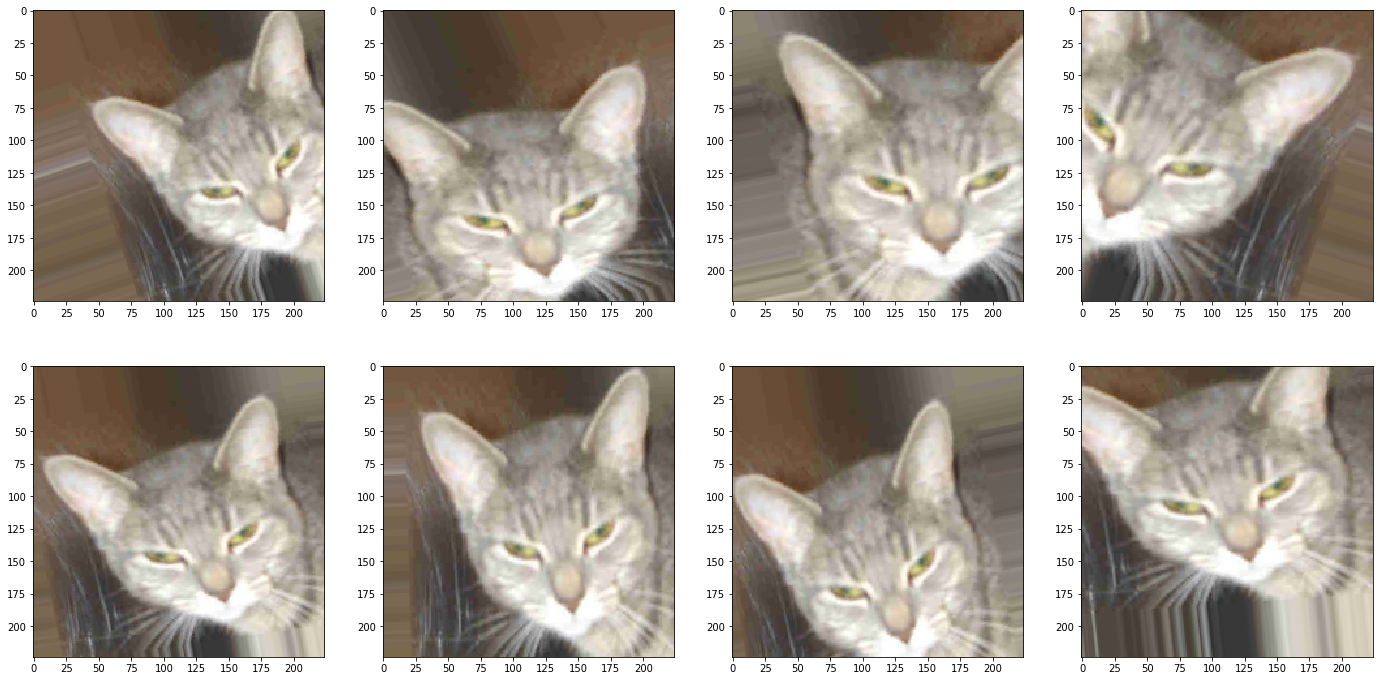

In [11]:
displayAugmentedImage('data/train', 'cats', 'cat.93.jpg', 224)

## Plot images with labels

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
(10, 224, 224, 3)
{'cats': 0, 'dogs': 1}


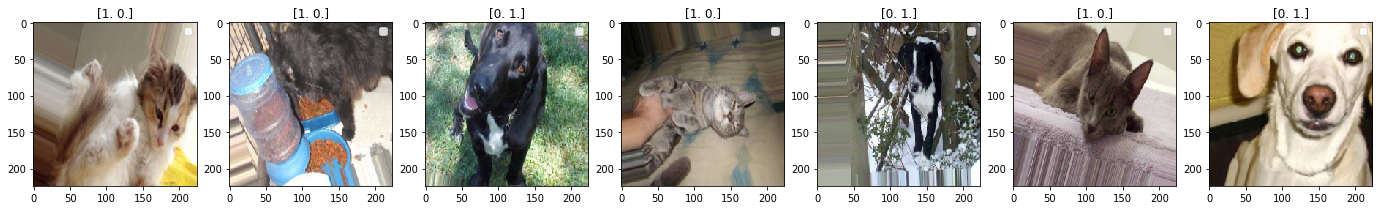

In [35]:
getDataBatches(64, 64, 64, 224)

# Grab the batch of next images.
imgs, labels = next(train_batches)
imgs = imgs[0:10, :]
labels = labels[0:10, :]

print(imgs.shape)
columns = 7

# Displays the indices of the labels (ex- cat:0 and dog:1).
print(train_batches.class_indices)

plt.figure(figsize=(24,10))
for i in range(columns):
    plt.subplot(5/columns+1, columns, i+1)
    plt.imshow(imgs[i])
    plt.title(labels[i])
    plt.legend(train_batches.class_indices)

In [13]:
def getBaseVGGModel(printTrainableLayers):
    # Keras will download the VGG16 model to our system.
    # include_top refers to including (or not) the densely connected classifier on top of the network.
    vgg16_model = keras.applications.vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))

    # VGG16 is not of type Sequential.
    print("Type of base model: %s" % type(vgg16_model))

    # print the number of layers in the model
    print("Number of layers in the base model: %d" % (len(vgg16_model.layers)))

    # create a plot (only if does not already exist) of the layers in the VGG model, as follows:
    if (not path.isfile('vgg16_without_top_layer.png')):
        plot_model(vgg16_model, to_file='vgg16_without_top_layer.png')

    # Freeze the layers except the last 4 layers
    for layer in vgg16_model.layers[:-4]:
        layer.trainable = False
    
    # Check the trainable status of individual layer
    if (printTrainableLayers):
        for layer in vgg16_model.layers:
            print(layer, layer.trainable)
        
    return vgg16_model

In [24]:
def buildModel(baseModel, layers_dims, hiddenActivation, outputActivation, keepProb):
    # Create a new model
    model_cnn = Sequential()

    # Add the vgg convolution base model
    model_cnn.add(baseModel)

    # Add new fully connected layers
    model_cnn.add(Flatten())
    
    hiddenLayersCount = len(layers_dims)
    
    print("Number of hidden layers: %d" %hiddenLayersCount)
    
    for i in range (0, hiddenLayersCount):
        model_cnn.add(Dense(layers_dims[i], activation=hiddenActivation, kernel_regularizer=regularizers.l2(0.01)))
        
        if i != hiddenLayersCount-1:
            model_cnn.add(keras.layers.Dropout(keepProb))
       
    # output layer
    model_cnn.add(Dense(2, activation=outputActivation))
    
    # print the type of model
    print(type(model_cnn))
    
    # print the number of layers in the model
    print('Number of layers in the Final Model =' , len(model_cnn.layers))
    
    return model_cnn

In [25]:
del train_batches, valid_batches, test_batches
gc.collect()

# Number of hidden units in each hidden layer
layers_dims = [32, 16]
# Get Base VGG16 model without top layer
baseModel = getBaseVGGModel(False)
# Get the model
model = buildModel(baseModel, layers_dims, 'relu', 'softmax', 0.5)
# print Model summary
model.summary()
# compile Model
model.compile(loss='binary_crossentropy', 
                  #optimizer=optimizers.SGD(lr=1e-4, momentum=0.9), 
                  optimizer=optimizers.adam(lr=1e-4), 
                  metrics = ['accuracy'])

# Get data batches
getDataBatches(64, 64, 64, 224)
print ('steps_per_epoch: %d' % (train_batches.samples/train_batches.batch_size))
print ('validation_steps:%d' % (valid_batches.samples/valid_batches.batch_size))

Type of base model: <class 'keras.engine.training.Model'>
Number of layers in the base model: 19
Number of hidden layers: 2
<class 'keras.engine.sequential.Sequential'>
Number of layers in the Final Model = 6
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                802848    
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________

### Training the Fine tuned VGG16 model

In [26]:
# By default, shuffle is True and it tells that the order of data your model is 
# iterating with each run/epoch will be different.
history = model.fit_generator(train_batches, 
                    steps_per_epoch=train_batches.samples/train_batches.batch_size,
                    validation_data=valid_batches, 
                    validation_steps=valid_batches.samples/valid_batches.batch_size, 
                    epochs=10, 
                    verbose=1,
                    workers=6)


Epoch 1/10
32/31 [==============================] - 38s 1s/step - loss: 1.3914 - acc: 0.6313 - val_loss: 1.0374 - val_acc: 0.8700
Epoch 2/10
32/31 [==============================] - 29s 898ms/step - loss: 1.0034 - acc: 0.8417 - val_loss: 0.9367 - val_acc: 0.8330
Epoch 3/10
32/31 [==============================] - 29s 901ms/step - loss: 0.8750 - acc: 0.8682 - val_loss: 0.6725 - val_acc: 0.9230
Epoch 4/10
32/31 [==============================] - 28s 890ms/step - loss: 0.6941 - acc: 0.9102 - val_loss: 0.5882 - val_acc: 0.9430
Epoch 5/10
32/31 [==============================] - 28s 885ms/step - loss: 0.6561 - acc: 0.9088 - val_loss: 0.5732 - val_acc: 0.9420
Epoch 6/10
32/31 [==============================] - 29s 908ms/step - loss: 0.5903 - acc: 0.9404 - val_loss: 0.5264 - val_acc: 0.9470
Epoch 7/10
32/31 [==============================] - 29s 919ms/step - loss: 0.5462 - acc: 0.9346 - val_loss: 0.5363 - val_acc: 0.9310
Epoch 8/10
32/31 [==============================] - 29s 896ms/step - los

In [ ]:
#del model, history
#gc.collect()

### Save Model

In [27]:
# Save the file only if it's not already present.
print (not path.isfile('VGG16_CD.h5'))

if (not path.isfile('VGG6_CD.h5')):
    model.save('VGG16_CD.h5')

False


## Displaying curves of loss and accuracy during training

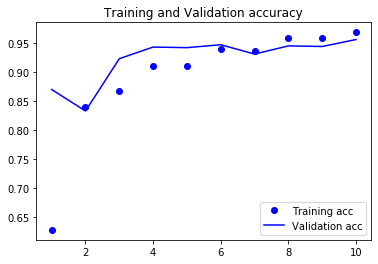

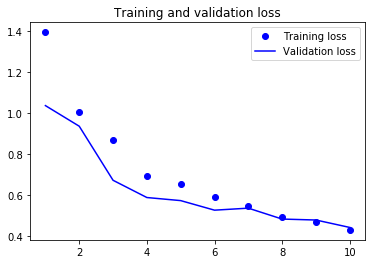

In [28]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

# get the number of epochs
epochs = range(1, len(acc) + 1)

# Plot accuracy of Training and Validation set
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Predict using fined tune VGG16 model

In [29]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

W0807 00:55:05.579510 140109329999232 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0807 00:55:05.594902 140109329999232 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0807 00:55:05.608843 140109329999232 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0807 00:55:05.623136 140109329999232 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0807 00:55:05.640858 140109329999232 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(10, 224, 224, 3)
{'cats': 0, 'dogs': 1}


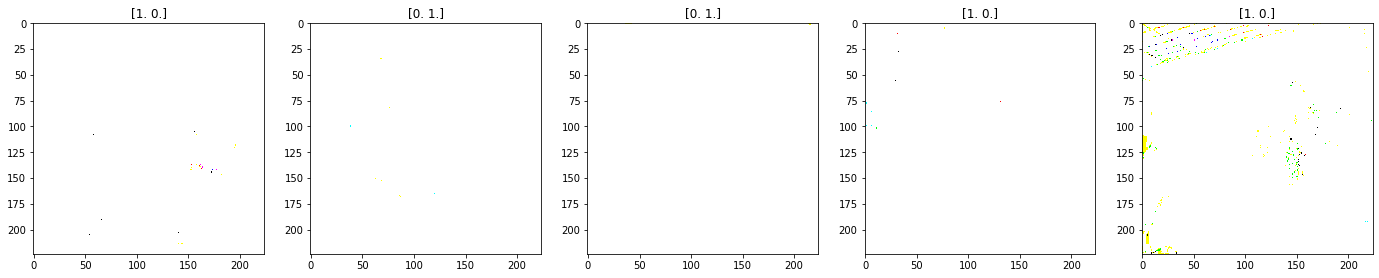

In [37]:
# Cat's images are labeled as (1,0) and Dog's images are labeled as (0,1)
test_imgs, test_labels = next(test_batches)
#plots(test_imgs, titles=test_labels)

# Grab the batch of next test images.
timgs = test_imgs[0:10, :]
tlabels = test_labels[0:10, :]
columns = 5

# Displays the indiices of the labels (ex - cat:0 and dog:1).
print(test_batches.class_indices)

plt.figure(figsize=(24,12))
for i in range(columns):
    plt.subplot(5/columns+1, columns, i+1)
    plt.imshow(timgs[i])
    plt.title(tlabels[i])

In [33]:
# Cats's images will be labeled as 1 instead of (1,0) 
# and Dog's imges will be labeled as 0 instead of (0,1)
test_labels = test_labels[:,0]
print(test_labels)

[0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0.]


In [38]:
# prints the metrics the model evaluates on
print('Model Metrics: %s' %model.metrics_names)

# steps per evaluation
testSteps = test_batches.samples/test_batches.batch_size

# prints loss and accuracy
testHistory = model.evaluate_generator(test_batches, steps=testSteps, verbose=1)
print('loss: %s' % testHistory[0])
print('accuracy: %s' % testHistory[1])

del testHistory
gc.collect()

Model Metrics: ['loss', 'acc']
16/15 [==============================] - 9s 554ms/step
loss: 1.1789687099456787
accuracy: 0.9470000009536743


55680

## Analysing incorrectly classified images

In [114]:
testSteps = test_batches.samples/test_batches.batch_size
# If there are 72 test images in total and the batch_size is 10 then steps = 72/10 = 7.2
# Alternatively, if there are 60 test images and the batch_size is 60 then steps=1
predictions = model.predict_generator(test_batches, steps=testSteps, verbose=0)
print (predictions.shape)

(1000, 2)


In [41]:
test_path = 'data/test'
testItr  = test_datagen.flow_from_directory(test_path, target_size=(224,224), 
                                            classes=['cats', 'dogs'], batch_size=1000)

X_test, y_test = testItr.next()
predicted_classes = model.predict_classes(X_test)
print('shape of predicted_classes: %s' % predicted_classes.shape)

Found 1000 images belonging to 2 classes.


In [62]:
correct_indices = np.nonzero(predicted_classes == np.argmax(y_test, axis=1))[0] 
incorrect_indices = np.nonzero(predicted_classes != np.argmax(y_test, axis=1))[0] 
print(len(correct_indices)," classified correctly") 
print(len(incorrect_indices)," classified incorrectly")

943  classified correctly
57  classified incorrectly


In [ ]:
%matplotlib inline
incorrectImagesCount = incorrect_indices.size

# prints the number of incorrectly classified images
print("incorrectly classified images: %s" % incorrectImagesCount)

# Displays the inditest_labelsces of the labels (ex- cat:0 and dog:1).
print(test_batches.class_indices)
columns = 5

plt.figure(figsize=(24,12))
for i in range(columns):
    # print("value of i: %s" % incorrect_indices[i])
    plt.subplot(5/columns+1, columns, i+1)
    imgplot = plt.imshow(X_test[incorrect_indices[i]], interpolation="None", cmap="Greys")
    plt.title(y_test[incorrect_indices[i]])
    
    # print ("prediction for index: %s %s",incorrect_indices[i], predicted_classes[incorrect_indices[i]])
    if (0 == predicted_classes[incorrect_indices[i]]):
        plt.xlabel("Predicted as cat")
    else:
        plt.xlabel("Predicted as Dog")
    
plt.show()

## Confusion Matrix
    

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment = 'center',
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm = confusion_matrix(test_labels, np.round(predictions[:,0]))

In [ ]:
cm_plots_labels = ['Cats', 'Dogs']
plot_confusion_matrix(cm, cm_plots_labels, title='Confusion Matrix')